# **PCA on Handwritten Digits (MNIST)**


██████╗  ██████╗ █████╗ 
██╔══██╗██╔════╝██╔══██╗
██████╔╝██║     ███████║
██╔═══╝ ██║     ██╔══██║
██║     ╚██████╗██║  ██║
╚═╝      ╚═════╝╚═╝  ╚═╝

PCA ON MNIST DATASET
DIMENSIONALITY REDUCTION

Dataset Shape: (70000, 784)
MNIST CSV file created: mnist_dataset.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reduced Shape: (70000, 50)


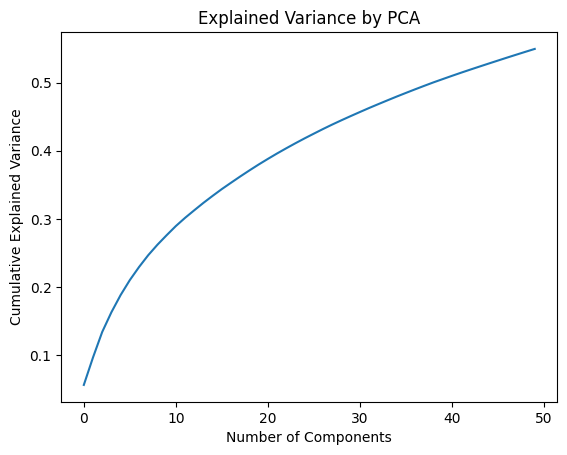

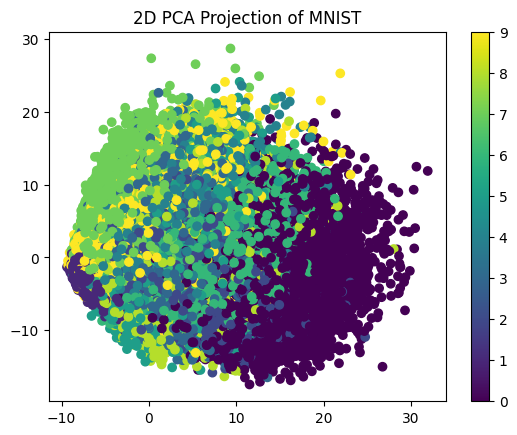

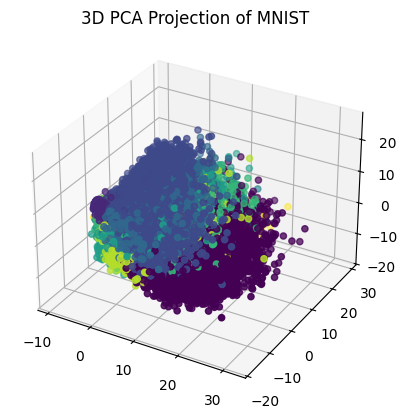

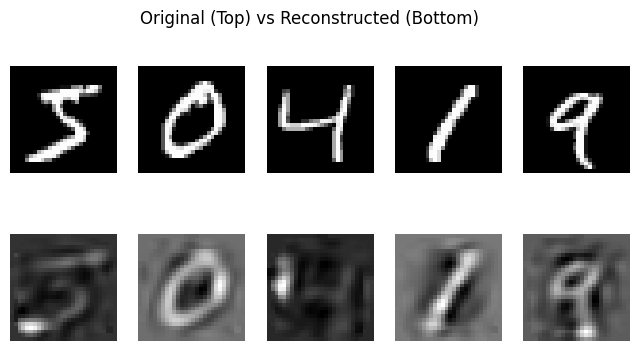

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

print("""
██████╗  ██████╗ █████╗
██╔══██╗██╔════╝██╔══██╗
██████╔╝██║     ███████║
██╔═══╝ ██║     ██╔══██║
██║     ╚██████╗██║  ██║
╚═╝      ╚═════╝╚═╝  ╚═╝

PCA ON MNIST DATASET
DIMENSIONALITY REDUCTION
""")

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

print("Dataset Shape:", X.shape)

mnist_df = pd.DataFrame(X)
mnist_df['label'] = y

csv_path = "mnist_dataset.csv"
mnist_df.to_csv(csv_path, index=False)

print("MNIST CSV file created:", csv_path)

from google.colab import files
files.download(csv_path)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print("Reduced Shape:", X_pca.shape)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA")
plt.show()

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure()
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y.astype(int))
plt.colorbar(scatter)
plt.title("2D PCA Projection of MNIST")
plt.show()

pca_3d = PCA(n_components=3)
X_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=y.astype(int))
ax.set_title("3D PCA Projection of MNIST")
plt.show()

pca_recon = PCA(n_components=50)
X_reduced = pca_recon.fit_transform(X_scaled)
X_reconstructed = pca_recon.inverse_transform(X_reduced)

plt.figure(figsize=(8,4))

for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap='gray')
    plt.axis('off')

    plt.subplot(2,5,i+6)
    plt.imshow(X_reconstructed[i].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.suptitle("Original (Top) vs Reconstructed (Bottom)")
plt.show()
